In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv('/kaggle/input/credit-risk-classification-dataset/customer_data.csv')
df2 = pd.read_csv('/kaggle/input/credit-risk-classification-dataset/payment_data.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [4]:
df1

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [5]:
df2

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [6]:
for i in df1.columns:
    values = df1[i].value_counts
    print(values)
    

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       0
3       1
4       0
       ..
1120    0
1121    0
1122    0
1123    0
1124    0
Name: label, Length: 1125, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       54982665
1       59004779
2       58990862
3       58995168
4       54987320
          ...   
1120    58988196
1121    58987926
1122    58995381
1123    58998054
1124    54989781
Name: id, Length: 1125, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       5
1       4
2       7
3       7
4       7
       ..
1120    5
1121    5
1122    7
1123    4
1124    4
Name: fea_1, Length: 1125, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       1245.5
1       1277.0
2       1298.0
3       1335.5
4          NaN
         ...  
1120    1289.0
1121       NaN
1122    1220.0
1123    1250.0
1124    1415.0
Name: fea_2, Length: 1125, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       3
1       1
2       1
3       1
4    

In [7]:
df1.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

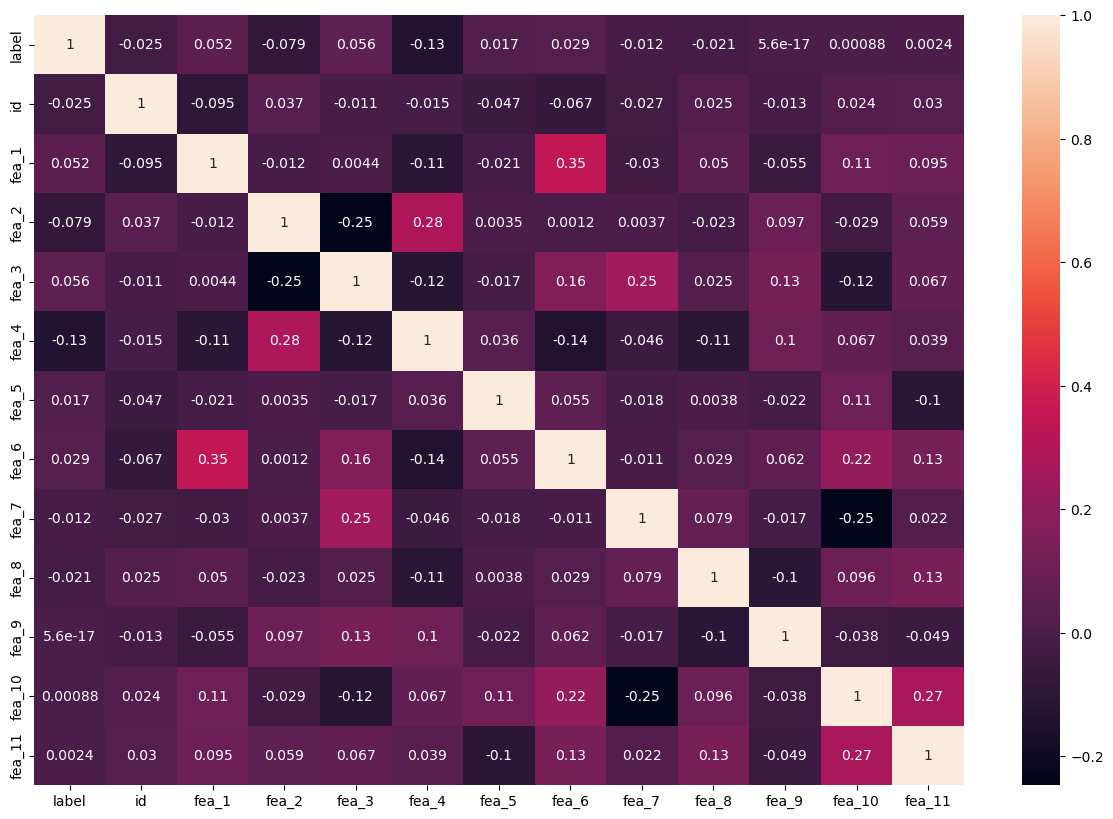

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

columns:  label


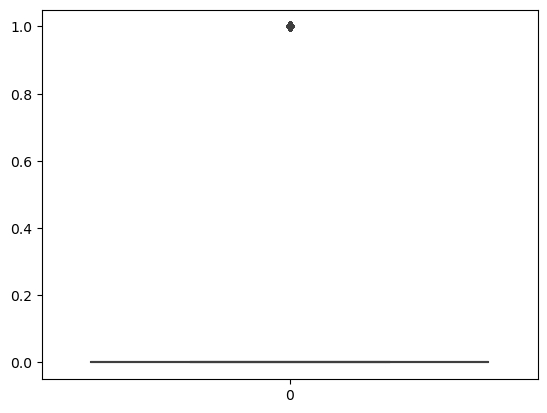

columns:  id


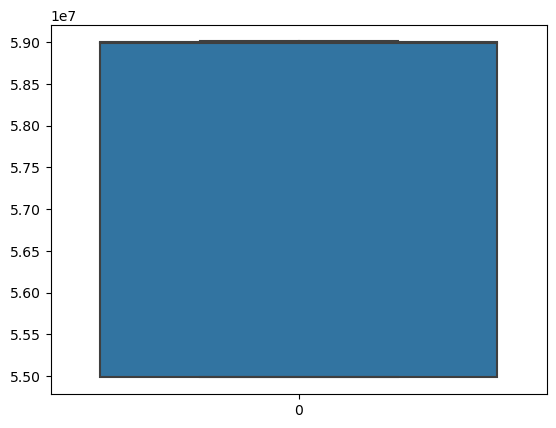

columns:  fea_1


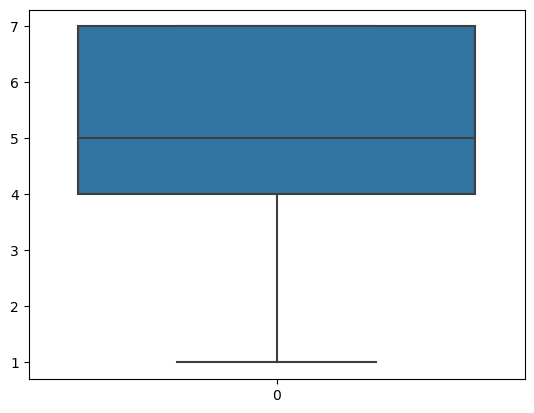

columns:  fea_2


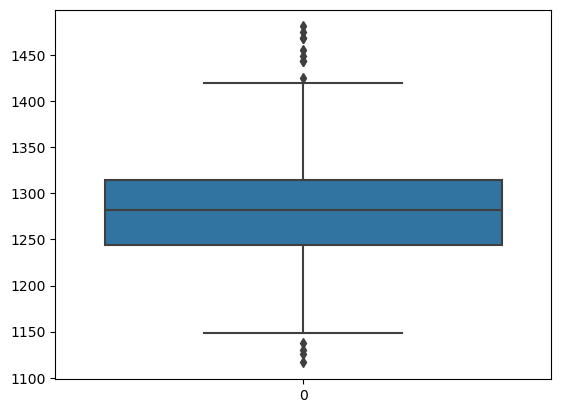

columns:  fea_3


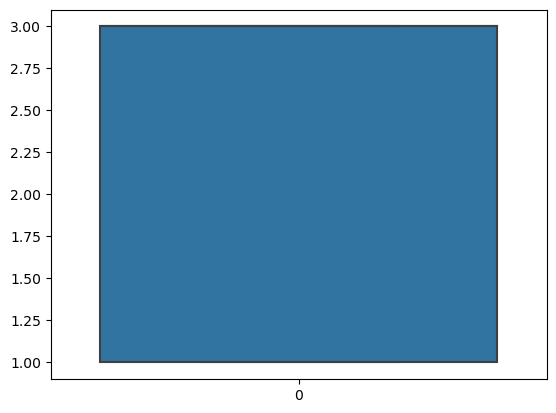

columns:  fea_4


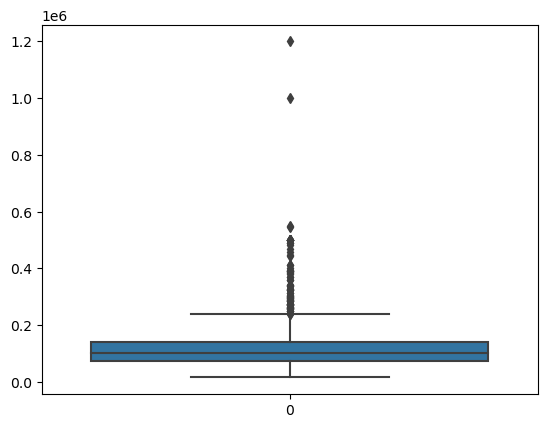

columns:  fea_5


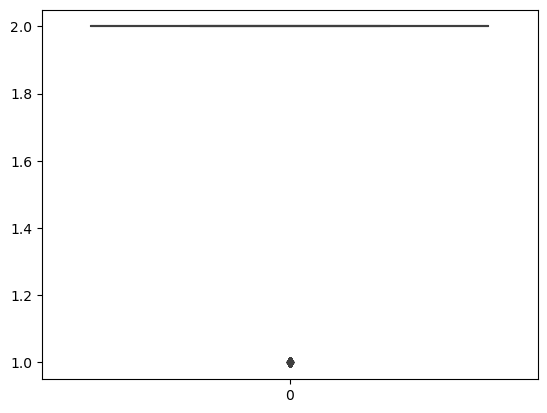

columns:  fea_6


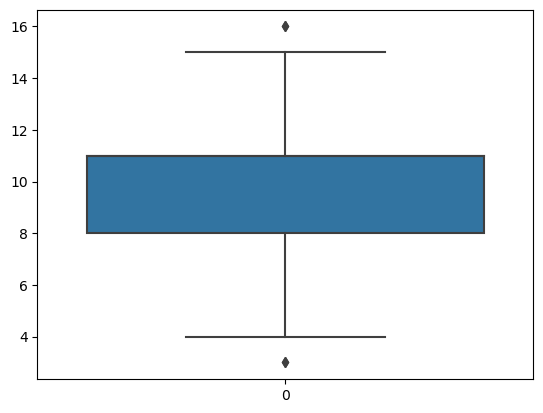

columns:  fea_7


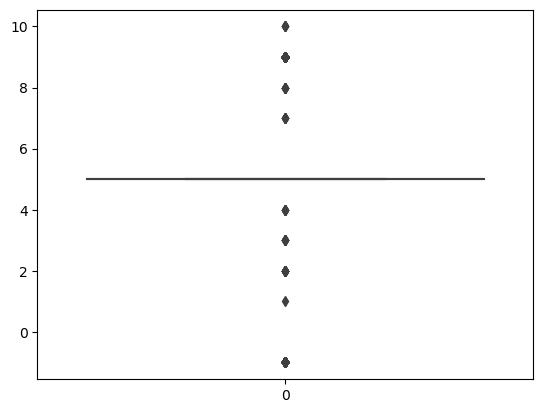

columns:  fea_8


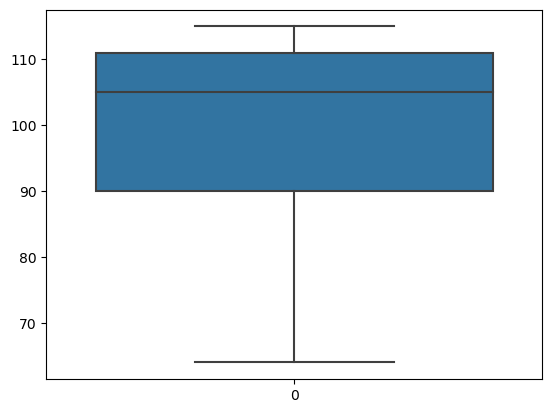

columns:  fea_9


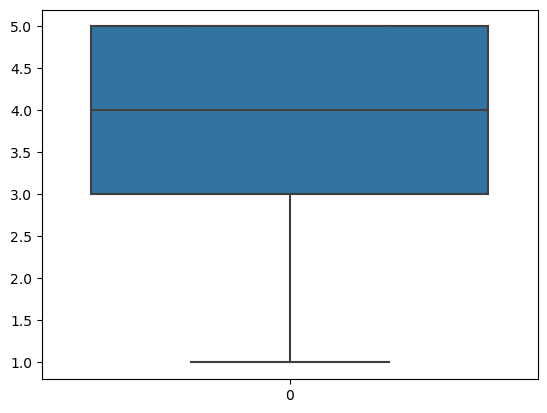

columns:  fea_10


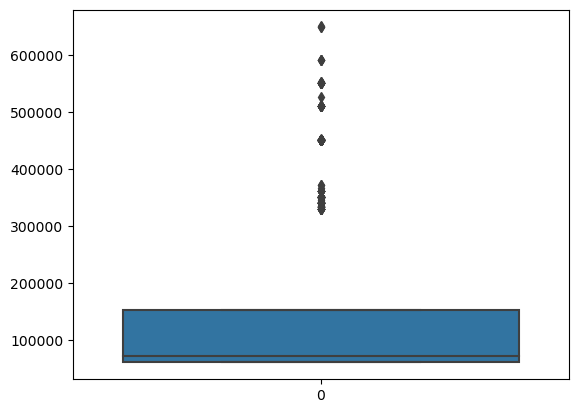

columns:  fea_11


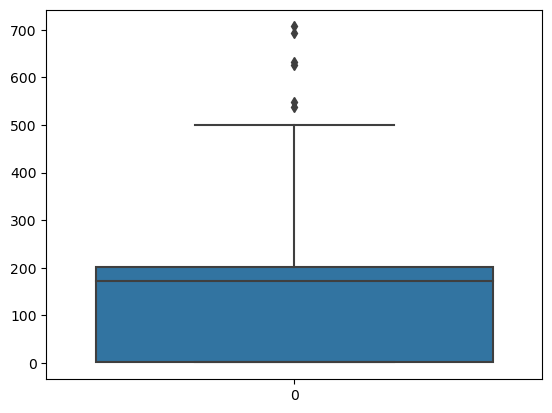

In [9]:
for i in df1.columns:
    print('columns: ', i)
    sns.boxplot(df1[i])
    plt.show()

In [10]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors = 3)
df1['fea_2'] = impute.fit_transform(df1[['fea_2']])

In [11]:
df1.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [12]:
df1

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


In [13]:
df2

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [15]:
df2['update_date'] = pd.to_datetime(df2['update_date'])
print(df2['update_date'].dtype)

datetime64[ns]


/tmp/ipykernel_20/68502532.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['update_date'] = pd.to_datetime(df2['update_date'])


In [16]:
df2.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

In [17]:
feature_data_count = df2.count()

print(feature_data_count)

id                 8250
OVD_t1             8250
OVD_t2             8250
OVD_t3             8250
OVD_sum            8250
pay_normal         8250
prod_code          8250
prod_limit         2132
update_date        8224
new_balance        8250
highest_balance    7841
report_date        7136
dtype: int64


In [18]:
import pandas as pd

# Assuming 'df2' is your DataFrame
df2['update_date'] = pd.to_datetime(df2['update_date'])

# Check if there are missing values in the 'update_date' column
missing_values = df2['update_date'].isnull().sum()
if missing_values > 0:
    print(f"There are {missing_values} missing values in the 'update_date' column.")
else:
    df2['year1'] = df2['update_date'].dt.year
    df2['month2'] = df2['update_date'].dt.month
    df2['day3'] = df2['update_date'].dt.day


There are 26 missing values in the 'update_date' column.


In [19]:
df2['report_year1'] = df2['update_date'].dt.year
df2['report_month'] = df2['update_date'].dt.month
df2['report_day'] = df2['update_date'].dt.day

In [20]:
df2['report_date'] = pd.to_datetime(df2['report_date'])  # Convert to datetime type

# Now you can use .dt accessor to extract year, month, and day
df2['year1'] = df2['report_date'].dt.year
df2['month2'] = df2['report_date'].dt.month
df2['day3'] = df2['report_date'].dt.day

/tmp/ipykernel_20/105918802.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['report_date'] = pd.to_datetime(df2['report_date'])  # Convert to datetime type


In [21]:
df2['year1'] = df2['report_date'].dt.year
df2['month2'] = df2['report_date'].dt.month
df2['day3'] = df2['report_date'].dt.day

In [22]:
df2

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,report_year1,report_month,report_day,year1,month2,day3
0,58987402,0,0,0,0,1,10,16500.0,2016-04-12,0.0,NaN,NaT,2016.0,4.0,12.0,NaN,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,2016-04-12,588720.0,491100.0,NaT,2016.0,4.0,12.0,NaN,NaN,NaN
2,58997200,0,0,0,0,2,5,NaN,2016-04-12,840000.0,700500.0,2016-04-22,2016.0,4.0,12.0,2016.0,4.0,22.0
3,54988608,0,0,0,0,3,10,37400.0,2016-03-12,8425.2,7520.0,2016-04-25,2016.0,3.0,12.0,2016.0,4.0,25.0
4,54987763,0,0,0,0,2,10,NaN,2016-03-12,15147.6,NaN,2016-04-26,2016.0,3.0,12.0,2016.0,4.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaT,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaT,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaT,20654.4,33315.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaT,0.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
cols = ['report_year1','report_month','report_day']
df2[cols] = df2[cols].round()
for i in cols:
    df2[i] = impute.fit_transform(df2[[i]])

In [24]:
df2

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,report_year1,report_month,report_day,year1,month2,day3
0,58987402,0,0,0,0,1,10,16500.0,2016-04-12,0.0,NaN,NaT,2016.000000,4.000000,12.00000,NaN,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,2016-04-12,588720.0,491100.0,NaT,2016.000000,4.000000,12.00000,NaN,NaN,NaN
2,58997200,0,0,0,0,2,5,NaN,2016-04-12,840000.0,700500.0,2016-04-22,2016.000000,4.000000,12.00000,2016.0,4.0,22.0
3,54988608,0,0,0,0,3,10,37400.0,2016-03-12,8425.2,7520.0,2016-04-25,2016.000000,3.000000,12.00000,2016.0,4.0,25.0
4,54987763,0,0,0,0,2,10,NaN,2016-03-12,15147.6,NaN,2016-04-26,2016.000000,3.000000,12.00000,2016.0,4.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaT,0.0,NaN,NaT,2011.617339,6.490029,15.21948,NaN,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaT,0.0,NaN,NaT,2011.617339,6.490029,15.21948,NaN,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaT,20654.4,33315.0,NaT,2011.617339,6.490029,15.21948,NaN,NaN,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaT,0.0,NaN,NaT,2011.617339,6.490029,15.21948,NaN,NaN,NaN


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8250 non-null   int64         
 1   OVD_t1           8250 non-null   int64         
 2   OVD_t2           8250 non-null   int64         
 3   OVD_t3           8250 non-null   int64         
 4   OVD_sum          8250 non-null   int64         
 5   pay_normal       8250 non-null   int64         
 6   prod_code        8250 non-null   int64         
 7   prod_limit       2132 non-null   float64       
 8   update_date      8224 non-null   datetime64[ns]
 9   new_balance      8250 non-null   float64       
 10  highest_balance  7841 non-null   float64       
 11  report_date      7136 non-null   datetime64[ns]
 12  report_year1     8250 non-null   float64       
 13  report_month     8250 non-null   float64       
 14  report_day       8250 non-null   float64

In [26]:
df2.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
report_year1          0
report_month          0
report_day            0
year1              1114
month2             1114
day3               1114
dtype: int64

/tmp/ipykernel_20/3724623295.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


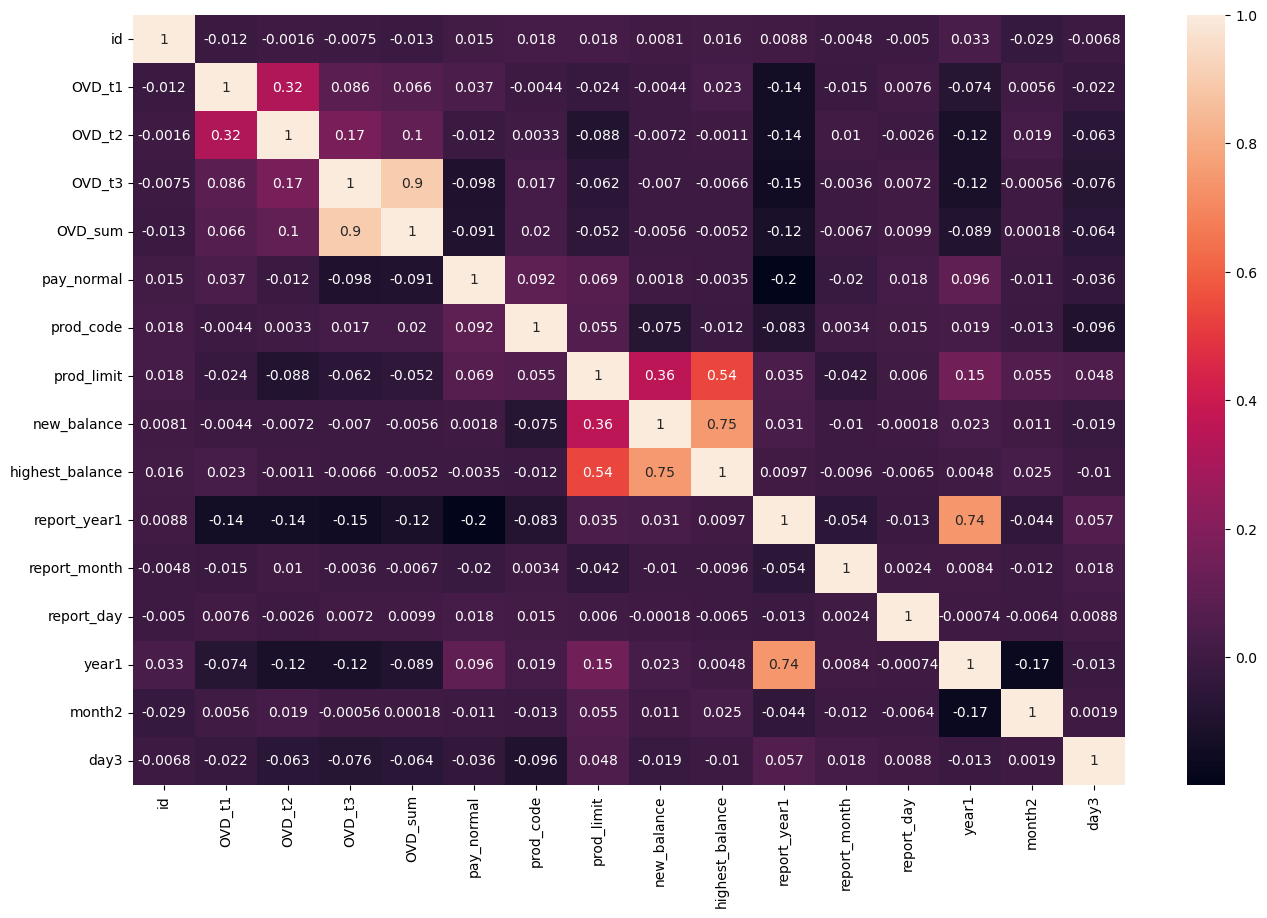

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [28]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
cols = ['year1','month2','day3']
df2[cols] = df2[cols].round()
for i in cols:
    df2[i] = impute.fit_transform(df2[[i]])

In [29]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
cols = ['report_year1','report_month','report_day']
df2[cols] = df2[cols].round()
for i in cols:
    df2[i] = impute.fit_transform(df2[[i]])

In [30]:
df2

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,report_year1,report_month,report_day,year1,month2,day3
0,58987402,0,0,0,0,1,10,16500.0,2016-04-12,0.0,NaN,NaT,2016.0,4.0,12.0,2013.985706,6.241872,17.821469
1,58995151,0,0,0,0,1,5,NaN,2016-04-12,588720.0,491100.0,NaT,2016.0,4.0,12.0,2013.985706,6.241872,17.821469
2,58997200,0,0,0,0,2,5,NaN,2016-04-12,840000.0,700500.0,2016-04-22,2016.0,4.0,12.0,2016.000000,4.000000,22.000000
3,54988608,0,0,0,0,3,10,37400.0,2016-03-12,8425.2,7520.0,2016-04-25,2016.0,3.0,12.0,2016.000000,4.000000,25.000000
4,54987763,0,0,0,0,2,10,NaN,2016-03-12,15147.6,NaN,2016-04-26,2016.0,3.0,12.0,2016.000000,4.000000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaT,0.0,NaN,NaT,2012.0,6.0,15.0,2013.985706,6.241872,17.821469
8246,54992408,0,0,0,0,1,2,NaN,NaT,0.0,NaN,NaT,2012.0,6.0,15.0,2013.985706,6.241872,17.821469
8247,54988209,0,0,0,0,5,13,NaN,NaT,20654.4,33315.0,NaT,2012.0,6.0,15.0,2013.985706,6.241872,17.821469
8248,54992408,0,0,0,0,1,2,NaN,NaT,0.0,NaN,NaT,2012.0,6.0,15.0,2013.985706,6.241872,17.821469


In [31]:
df2.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
report_year1          0
report_month          0
report_day            0
year1                 0
month2                0
day3                  0
dtype: int64

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8250 non-null   int64         
 1   OVD_t1           8250 non-null   int64         
 2   OVD_t2           8250 non-null   int64         
 3   OVD_t3           8250 non-null   int64         
 4   OVD_sum          8250 non-null   int64         
 5   pay_normal       8250 non-null   int64         
 6   prod_code        8250 non-null   int64         
 7   prod_limit       2132 non-null   float64       
 8   update_date      8224 non-null   datetime64[ns]
 9   new_balance      8250 non-null   float64       
 10  highest_balance  7841 non-null   float64       
 11  report_date      7136 non-null   datetime64[ns]
 12  report_year1     8250 non-null   float64       
 13  report_month     8250 non-null   float64       
 14  report_day       8250 non-null   float64

In [33]:
for column in df2.columns:
    value_counts = df2[column].value_counts()
    print(f"Value counts for '{column}':\n{value_counts}\n")

Value counts for 'id':
58988212    55
54990497    48
58998646    45
58991343    39
58987276    39
            ..
59003280     1
58997216     1
54988258     1
58995803     1
54986089     1
Name: id, Length: 1125, dtype: int64

Value counts for 'OVD_t1':
0     7475
1      397
2      147
3       61
4       61
5       26
6       20
7       15
8       14
9        9
11       5
12       4
14       3
15       2
16       2
10       2
31       2
13       2
17       1
34       1
23       1
Name: OVD_t1, dtype: int64

Value counts for 'OVD_t2':
0     7886
2      127
1      111
3       43
4       31
5       12
6        9
7        9
9        7
10       4
11       4
8        3
12       1
23       1
14       1
34       1
Name: OVD_t2, dtype: int64

Value counts for 'OVD_t3':
0     7983
1       46
2       35
3       22
35      15
6       14
5       13
34      12
4       12
9       12
20       7
33       6
7        5
24       5
13       5
18       5
17       5
11       4
32       4
14       4
8        4

/tmp/ipykernel_20/3724623295.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


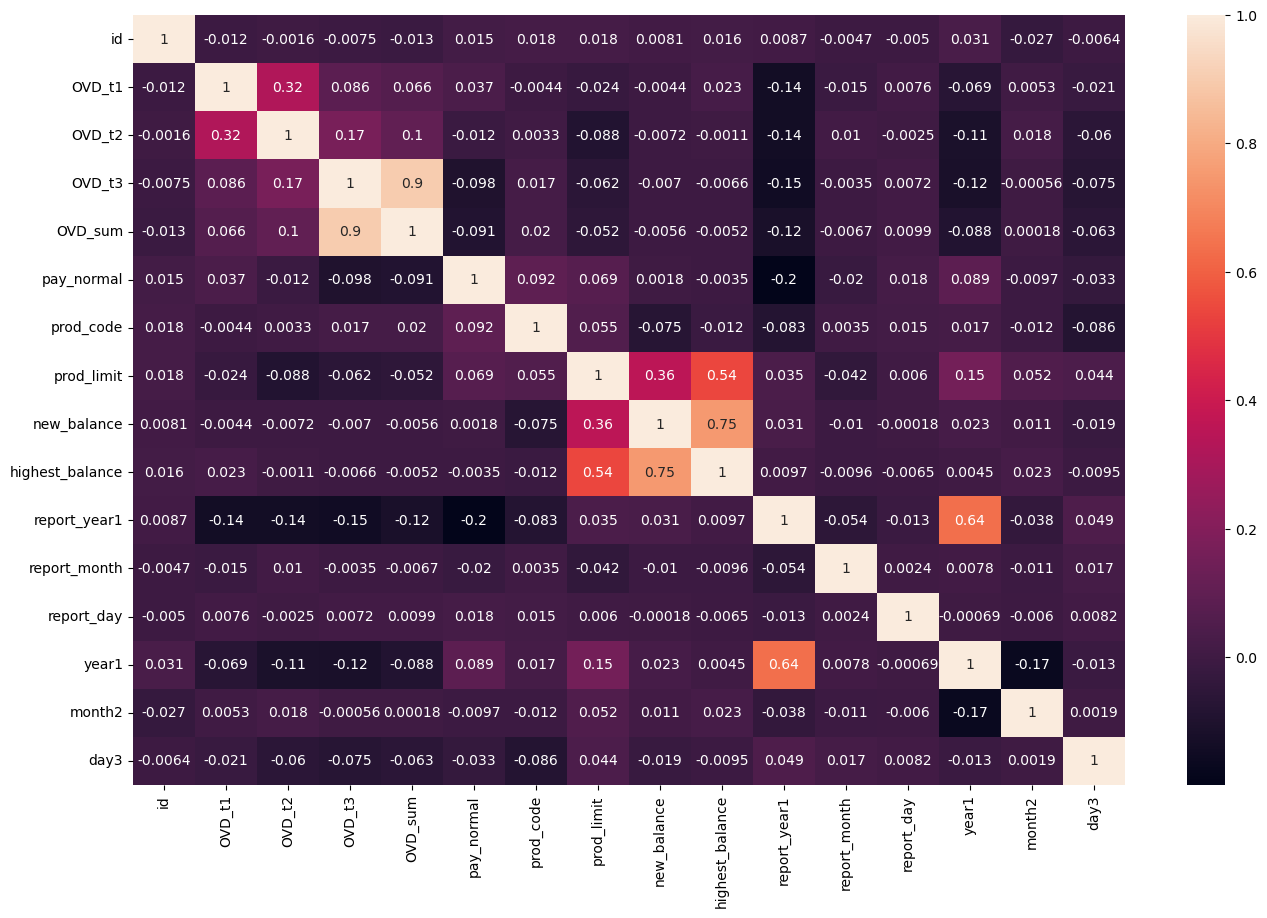

In [34]:
plt.figure(figsize=(16,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [35]:
cols = ['report_year1','report_month','report_day','year1','month2','day3']

for i in cols:
    df2[i] = df2[i].astype(int)

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8250 non-null   int64         
 1   OVD_t1           8250 non-null   int64         
 2   OVD_t2           8250 non-null   int64         
 3   OVD_t3           8250 non-null   int64         
 4   OVD_sum          8250 non-null   int64         
 5   pay_normal       8250 non-null   int64         
 6   prod_code        8250 non-null   int64         
 7   prod_limit       2132 non-null   float64       
 8   update_date      8224 non-null   datetime64[ns]
 9   new_balance      8250 non-null   float64       
 10  highest_balance  7841 non-null   float64       
 11  report_date      7136 non-null   datetime64[ns]
 12  report_year1     8250 non-null   int64         
 13  report_month     8250 non-null   int64         
 14  report_day       8250 non-null   int64  

In [37]:
# Read the two datasets
df1 = pd.read_csv("/kaggle/input/credit-risk-classification-dataset/customer_data.csv")
df2 = pd.read_csv("/kaggle/input/credit-risk-classification-dataset/payment_data.csv")

# Merge the datasets based on a common key

merged_df = df1.merge(df2, on='id')

In [38]:
merged_df.drop(columns=['update_date','report_date'],inplace=True)


In [39]:
merged_df.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
new_balance           0
highest_balance     409
dtype: int64

In [40]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors= 3)
cols = ['prod_limit','highest_balance','fea_2']
merged_df[cols] = merged_df[cols].round()
for i in cols:
    merged_df[i] = impute.fit_transform(merged_df[[i]])

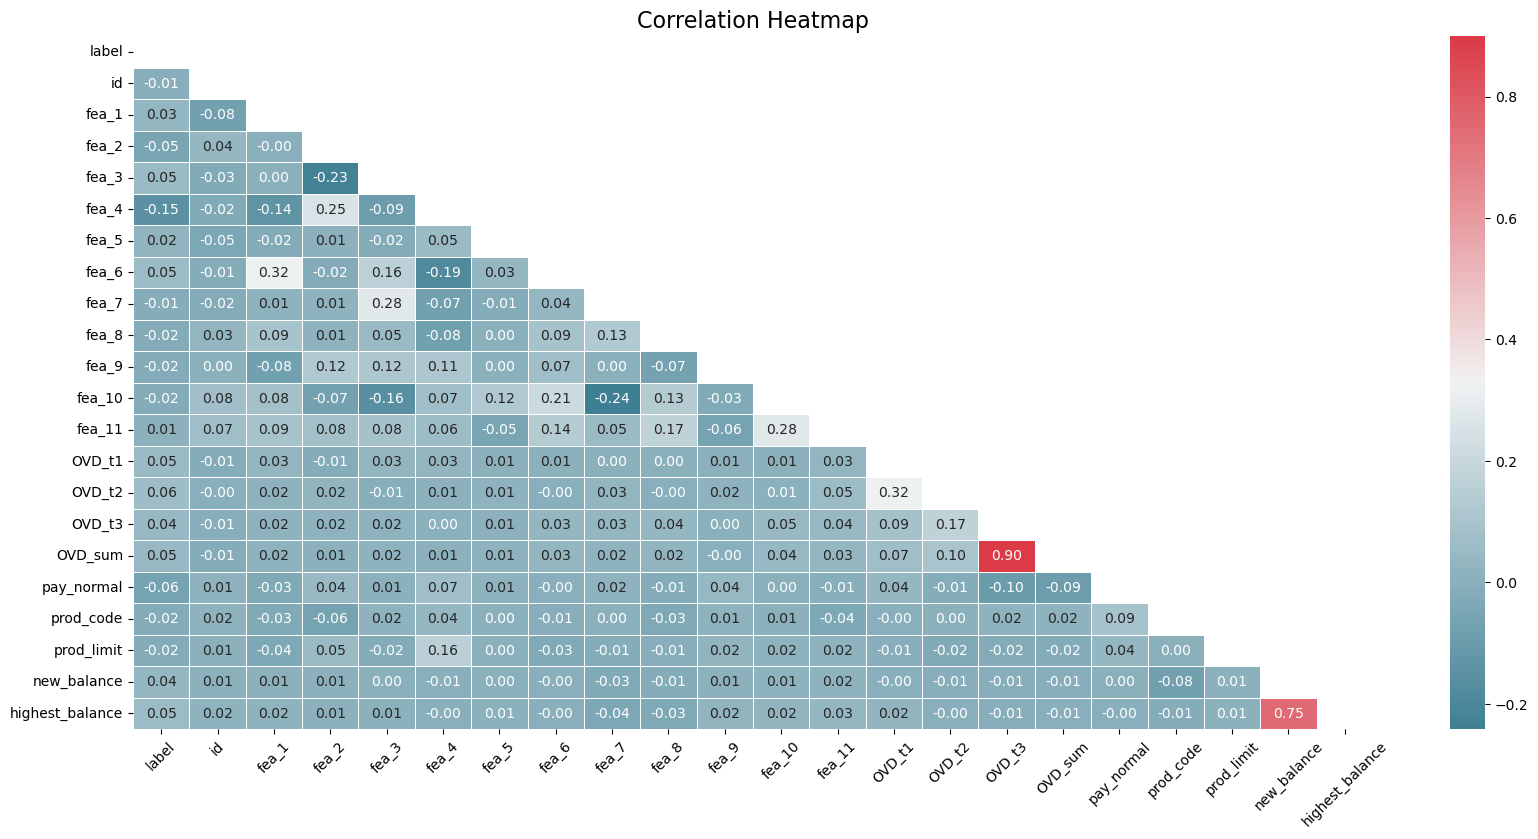

In [41]:
corr_matrix = merged_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 9))
plt.title("Correlation Heatmap", fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

In [42]:
x = merged_df.drop(columns=['label'],axis=1)
y = merged_df['label']

In [43]:
merged_df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
0,1,54982665,5,1246.0,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,9,10,60500.00000,6657.6,18934.0
1,1,54982665,5,1246.0,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,18,10,85789.70122,153792.0,149387.0
2,1,54982665,5,1246.0,3,77000.0,2,15,5,109,...,244.948974,0,0,0,0,1,5,85789.70122,0.0,150500.0
3,1,54982665,5,1246.0,3,77000.0,2,15,5,109,...,244.948974,0,2,26,11906,6,10,85789.70122,0.0,46371.0
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,207.173840,0,0,0,0,4,6,85789.70122,15120.0,21500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,10,13,85789.70122,0.0,35500.0
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,1.000000,0,0,0,0,1,10,85789.70122,-121.2,601.0
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,273.861279,0,0,0,0,12,2,85789.70122,334130.4,2400500.0
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,273.861279,0,0,0,0,7,1,85789.70122,456098.4,406938.0


In [44]:
ans = merged_df.columns
print(ans)

Index(['label', 'id', 'fea_1', 'fea_2', 'fea_3', 'fea_4', 'fea_5', 'fea_6',
       'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11', 'OVD_t1', 'OVD_t2',
       'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_code', 'prod_limit',
       'new_balance', 'highest_balance'],
      dtype='object')


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size= 0.2)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size= 0.2)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [49]:
Y_pred_lr.shape

(1650,)

In [50]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.06 %


In [51]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [52]:
Y_pred_nb.shape

(1650,)

In [53]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 83.03 %


In [54]:
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Fit the random forest classifier
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = model1.predict(X_test)

In [56]:
# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
score_rf = accuracy_score(y_test,predictions)
print('logisticRegression:' )
print("Accuracy:", accuracy)
print()
print('RandomForestClassifier:' )
print("Accuracy:", score_rf)

logisticRegression:
Accuracy: 0.82

RandomForestClassifier:
Accuracy: 0.8115151515151515


In [57]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [58]:
print(Y_pred_dt.shape)

(1650,)


In [59]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 99.09 %


In [60]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [61]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [62]:
Y_pred_xgb.shape

(1650,)

In [63]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 99.33 %


In [64]:
import pickle
with open('model2.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [65]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [67]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=21))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
207/207 [==============================] - 1s 2ms/step - loss: 1730493.1250 - accuracy: 0.5144
Epoch 2/300
207/207 [==============================] - 0s 2ms/step - loss: 12765.2080 - accuracy: 0.7518
Epoch 3/300
207/207 [==============================] - 0s 2ms/step - loss: 6066.7949 - accuracy: 0.7530
Epoch 4/300
207/207 [==============================] - 0s 2ms/step - loss: 4859.3936 - accuracy: 0.7539
Epoch 5/300
207/207 [==============================] - 0s 2ms/step - loss: 3742.0366 - accuracy: 0.7573
Epoch 6/300
207/207 [==============================] - 0s 2ms/step - loss: 3240.0430 - accuracy: 0.7480
Epoch 7/300
207/207 [==============================] - 0s 2ms/step - loss: 2900.4470 - accuracy: 0.7426
Epoch 8/300
207/207 [==============================] - 0s 2ms/step - loss: 3745.0310 - accuracy: 0.7388
Epoch 9/300
207/207 [==============================] - 0s 2ms/step - loss: 3808.7891 - accuracy: 0.7311
Epoch 10/300
207/207 [==============================] - 0s 2

In [69]:
Y_pred_nn = model.predict(X_test)

52/52 [==============================] - 0s 1ms/step


In [70]:
Y_pred_nn.shape

(1650, 1)

In [71]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [72]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 83.88 %


In [73]:

scores = [score_lr,score_nb,score_dt,score_rf*100,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 84.06 %
The accuracy score achieved using Naive Bayes is: 83.03 %
The accuracy score achieved using Decision Tree is: 99.09 %
The accuracy score achieved using Random Forest is: 81.15151515151516 %
The accuracy score achieved using XGBoost is: 99.33 %
The accuracy score achieved using Neural Network is: 83.88 %


In [74]:
scores

[84.06, 83.03, 99.09, 81.15151515151516, 99.33, 83.88]

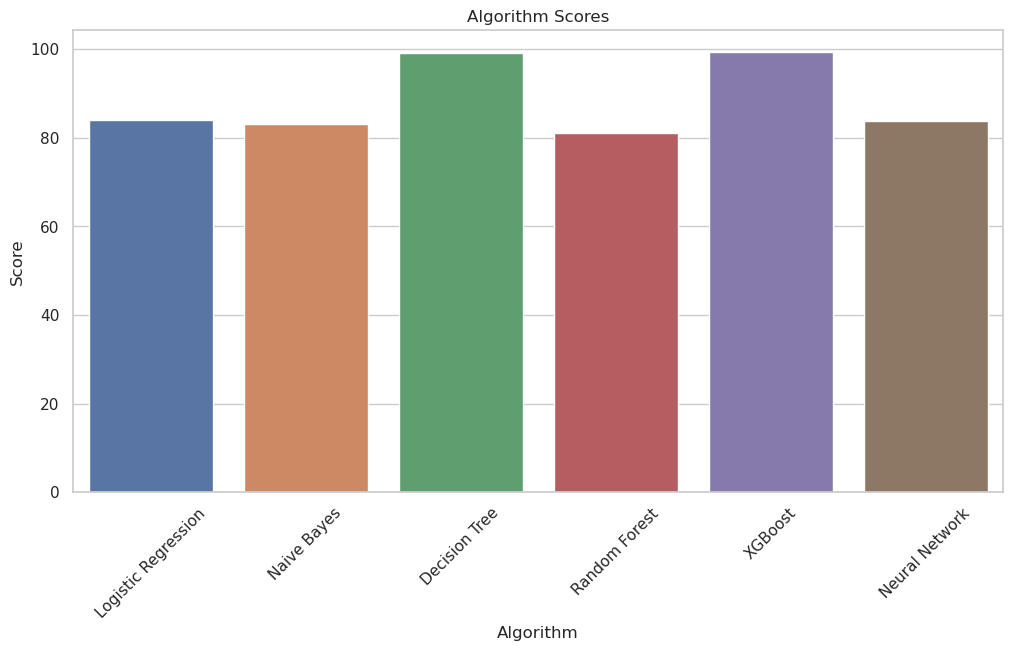

In [75]:
sns.set(style="whitegrid")
data = {
    "Algorithm": algorithms,
    "Score": scores
}
df = pd.DataFrame(data)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Algorithm", y="Score")
plt.title("Algorithm Scores")
plt.xticks(rotation=45)
plt.show()
